In [503]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [505]:
Path = 'train.csv'
df = pd.read_csv(Path)

In [507]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [510]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [512]:
df = df.dropna()

In [514]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [516]:
df.duplicated().sum()

0

In [519]:
df.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
5,6,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600
6,7,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800
7,8,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520
8,9,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040
9,10,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000


In [521]:
# Drop columns only if they exist in the dataset
unused_cols = ['Row ID', 'Ship Date', 'Ship Mode', 'Segment','Region', 'Sub-Category', 'Country']
cols_to_drop = [col for col in unused_cols if col in df.columns]

# Now drop the identified columns
df.drop(columns=cols_to_drop, inplace=True)

In [523]:
df.head(10)

,Order ID,Order Date,Customer ID,Customer Name,City,State,Postal Code,Product ID,Category,Product Name,Sales
0,CA-2017-152156,08/11/2017,CG-12520,Claire Gute,Henderson,Kentucky,42420.0,FUR-BO-10001798,Furniture,Bush Somerset Collection Bookcase,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Claire Gute,Henderson,Kentucky,42420.0,FUR-CH-10000454,Furniture,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Darrin Van Huff,Los Angeles,California,90036.0,OFF-LA-10000240,Office Supplies,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Sean O'Donnell,Fort Lauderdale,Florida,33311.0,FUR-TA-10000577,Furniture,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Sean O'Donnell,Fort Lauderdale,Florida,33311.0,OFF-ST-10000760,Office Supplies,Eldon Fold 'N Roll Cart System,22.3680
5,CA-2015-115812,09/06/2015,BH-11710,Brosina Hoffman,Los Angeles,California,90032.0,FUR-FU-10001487,Furniture,Eldon Expressions Wood and Plastic Desk Access...,48.8600
6,CA-2015-115812,09/06/2015,BH-11710,Brosina Hoffman,Los Angeles,California,90032.0,OFF-AR-10002833,Office Supplies,Newell 322,7.2800
7,CA-2015-115812,09/06/2015,BH-11710,Brosina Hoffman,Los Angeles,California,90032.0,TEC-PH-10002275,Technology,Mitel 5320 IP Phone VoIP phone,907.1520
8,CA-2015-115812,09/06/2015,BH-11710,Brosina Hoffman,Los Angeles,California,90032.0,OFF-BI-10003910,Office Supplies,DXL Angle-View Binders with Locking Rings by S...,18.5040
9,CA-2015-115812,09/06/2015,BH-11710,Brosina Hoffman,Los Angeles,California,90032.0,OFF-AP-10002892,Office Supplies,Belkin F5C206VTEL 6 Outlet Surge,114.9000


In [525]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Order_day'] = df['Order Date'].dt.day
df['Order_month'] = df['Order Date'].dt.month
df['Order_year'] = df['Order Date'].dt.year
df.drop(columns=['Order Date'],inplace=True)

In [527]:
df.head(10)

,Order ID,Customer ID,Customer Name,City,State,Postal Code,Product ID,Category,Product Name,Sales,Order_day,Order_month,Order_year
0,CA-2017-152156,CG-12520,Claire Gute,Henderson,Kentucky,42420.0,FUR-BO-10001798,Furniture,Bush Somerset Collection Bookcase,261.9600,8,11,2017
1,CA-2017-152156,CG-12520,Claire Gute,Henderson,Kentucky,42420.0,FUR-CH-10000454,Furniture,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,8,11,2017
2,CA-2017-138688,DV-13045,Darrin Van Huff,Los Angeles,California,90036.0,OFF-LA-10000240,Office Supplies,Self-Adhesive Address Labels for Typewriters b...,14.6200,12,6,2017
3,US-2016-108966,SO-20335,Sean O'Donnell,Fort Lauderdale,Florida,33311.0,FUR-TA-10000577,Furniture,Bretford CR4500 Series Slim Rectangular Table,957.5775,11,10,2016
4,US-2016-108966,SO-20335,Sean O'Donnell,Fort Lauderdale,Florida,33311.0,OFF-ST-10000760,Office Supplies,Eldon Fold 'N Roll Cart System,22.3680,11,10,2016
5,CA-2015-115812,BH-11710,Brosina Hoffman,Los Angeles,California,90032.0,FUR-FU-10001487,Furniture,Eldon Expressions Wood and Plastic Desk Access...,48.8600,9,6,2015
6,CA-2015-115812,BH-11710,Brosina Hoffman,Los Angeles,California,90032.0,OFF-AR-10002833,Office Supplies,Newell 322,7.2800,9,6,2015
7,CA-2015-115812,BH-11710,Brosina Hoffman,Los Angeles,California,90032.0,TEC-PH-10002275,Technology,Mitel 5320 IP Phone VoIP phone,907.1520,9,6,2015
8,CA-2015-115812,BH-11710,Brosina Hoffman,Los Angeles,California,90032.0,OFF-BI-10003910,Office Supplies,DXL Angle-View Binders with Locking Rings by S...,18.5040,9,6,2015
9,CA-2015-115812,BH-11710,Brosina Hoffman,Los Angeles,California,90032.0,OFF-AP-10002892,Office Supplies,Belkin F5C206VTEL 6 Outlet Surge,114.9000,9,6,2015


In [529]:
encoder=LabelEncoder()
df['Customer ID']=encoder.fit_transform(df['Customer ID'])
df['Product ID']=encoder.fit_transform(df['Product ID'])
df['Order ID']=encoder.fit_transform(df['Order ID'])
df['Customer Name']=encoder.fit_transform(df['Customer Name'])
#df['Country']=encoder.fit_transform(df['Country'])
df['City']=encoder.fit_transform(df['City'])
df['State']=encoder.fit_transform(df['State'])
df['Category']=encoder.fit_transform(df['Category'])
df['Product Name']=encoder.fit_transform(df['Product Name'])

In [531]:
df.head(4)

,Order ID,Customer ID,Customer Name,City,State,Postal Code,Product ID,Category,Product Name,Sales,Order_day,Order_month,Order_year
0,2454,143,166,194,15,42420.0,12,0,385,261.9600,8,11,2017
1,2454,143,166,194,15,42420.0,55,0,837,731.9400,8,11,2017
2,2252,237,201,265,3,90036.0,945,1,1431,14.6200,12,6,2017
3,4292,705,687,153,8,33311.0,319,0,365,957.5775,11,10,2016


In [533]:
target = df['Sales']
df = df.drop(columns=['Sales'])
df['Sales'] = target
df.head()

,Order ID,Customer ID,Customer Name,City,State,Postal Code,Product ID,Category,Product Name,Order_day,Order_month,Order_year,Sales
0,2454,143,166,194,15,42420.0,12,0,385,8,11,2017,261.9600
1,2454,143,166,194,15,42420.0,55,0,837,8,11,2017,731.9400
2,2252,237,201,265,3,90036.0,945,1,1431,12,6,2017,14.6200
3,4292,705,687,153,8,33311.0,319,0,365,11,10,2016,957.5775
4,4292,705,687,153,8,33311.0,1315,1,572,11,10,2016,22.3680


In [536]:
corr_matrix = df.corr()
corr_matrix

,Order ID,Customer ID,Customer Name,City,State,Postal Code,Product ID,Category,Product Name,Order_day,Order_month,Order_year,Sales
Order ID,1.000000,-0.013033,-0.015257,-0.042121,0.015319,0.005176,-0.003664,-0.001296,-0.007564,-0.009917,-0.032996,0.706648,-0.009937
Customer ID,-0.013033,1.000000,0.995737,0.005591,0.001294,0.012882,0.005896,0.009240,-0.006720,0.012515,0.004871,-0.040539,0.017070
Customer Name,-0.015257,0.995737,1.000000,0.003656,0.000951,0.012132,0.007423,0.010320,-0.005821,0.011465,0.006328,-0.042755,0.016754
City,-0.042121,0.005591,0.003656,1.000000,0.008981,0.096905,0.011692,0.013568,-0.000625,-0.017527,0.003325,0.000290,0.006550
State,0.015319,0.001294,0.000951,0.008981,1.000000,-0.285191,0.006611,0.006797,-0.001373,-0.033669,-0.004615,0.009684,0.001399
Postal Code,0.005176,0.012882,0.012132,0.096905,-0.285191,1.000000,0.000862,-0.000796,0.023376,0.017936,0.021685,0.006418,-0.024067
Product ID,-0.003664,0.005896,0.007423,0.011692,0.006611,0.000862,1.000000,0.879733,0.184721,-0.008187,-0.006423,0.003822,0.049541
Category,-0.001296,0.009240,0.010320,0.013568,0.006797,-0.000796,0.879733,1.000000,0.114141,-0.014375,-0.012288,0.003821,0.042443
Product Name,-0.007564,-0.006720,-0.005821,-0.000625,-0.001373,0.023376,0.184721,0.114141,1.000000,0.018381,0.004627,-0.002574,-0.040648
Order_day,-0.009917,0.012515,0.011465,-0.017527,-0.033669,0.017936,-0.008187,-0.014375,0.018381,1.000000,-0.030586,-0.020000,0.004035


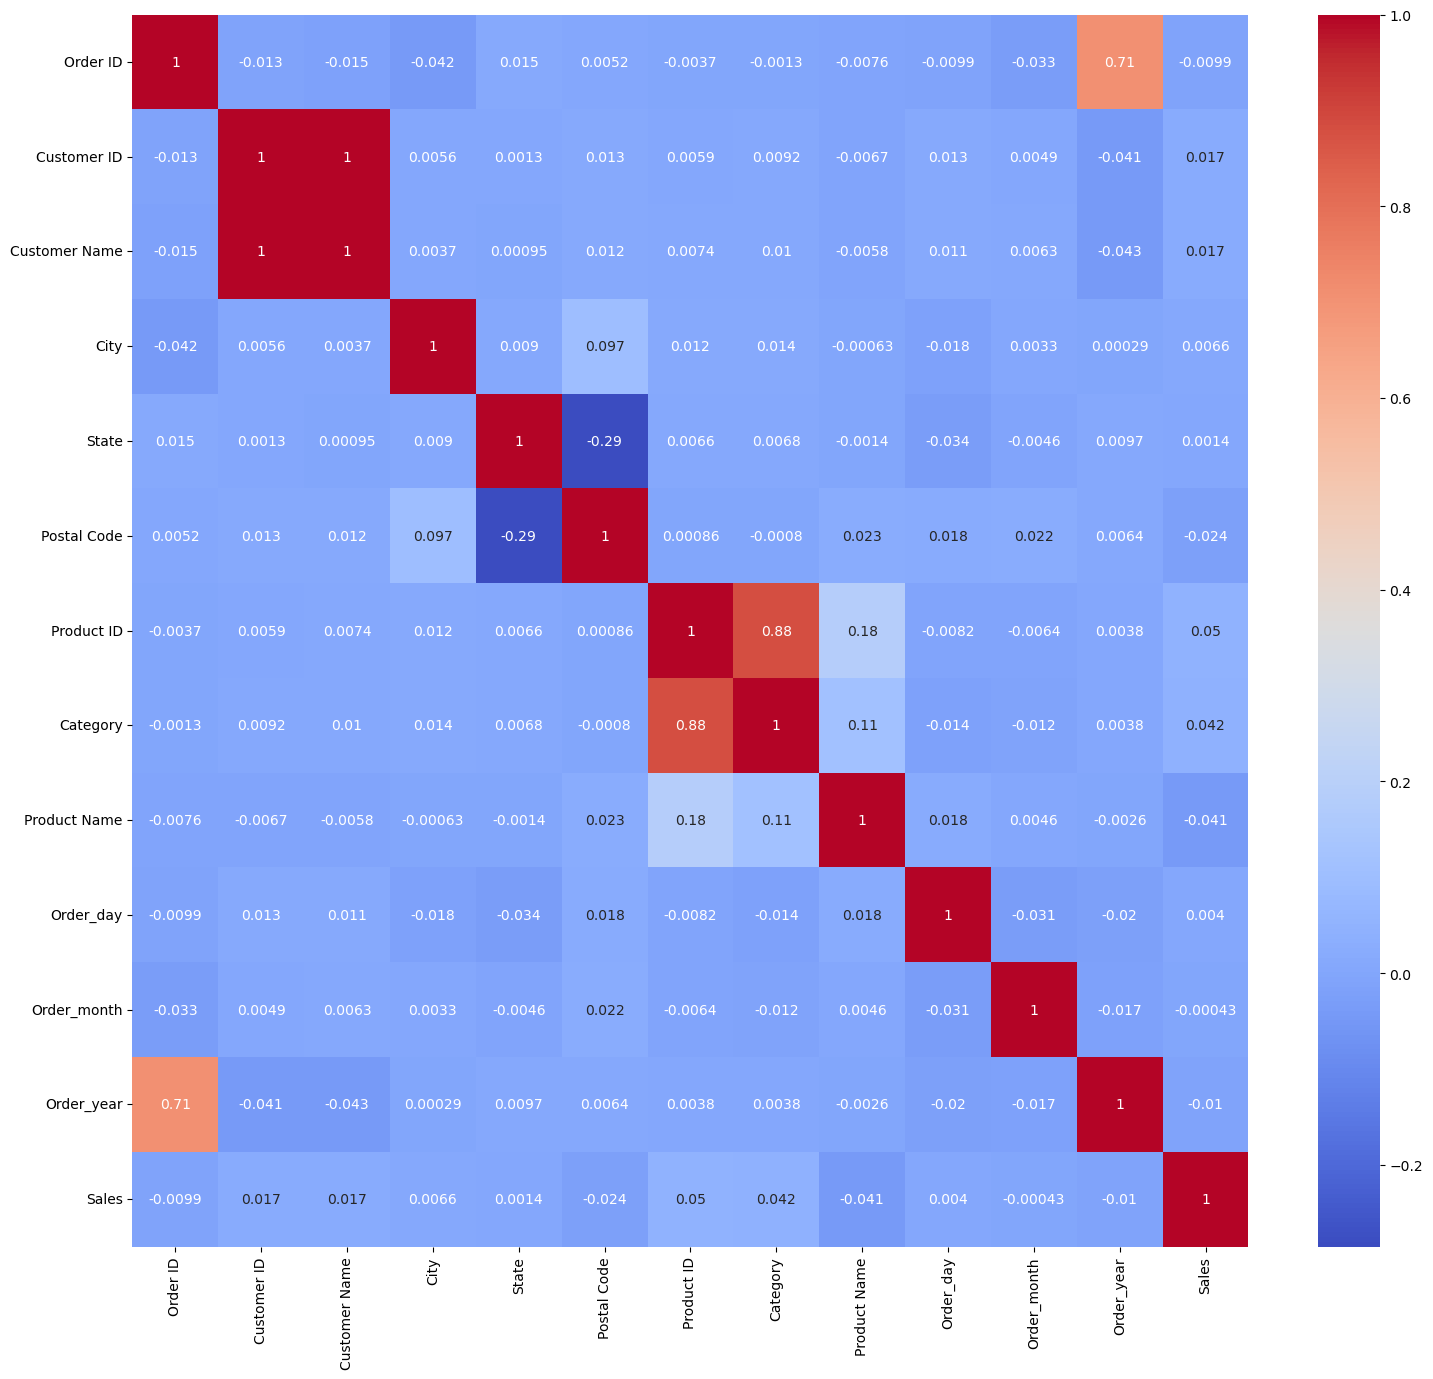

In [538]:
plt.figure(figsize = (18,16))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.show()

In [539]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=62)

In [540]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [544]:
# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=200, random_state=72)

# Train the model
rf_regressor.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200, random_state=72)

In [545]:
# Predict on the test set
# Make predictions
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared score

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared Score: {r2}")


Mean Squared Error: 320228.35894021706
Root Mean Squared Error: 565.887231646215
R-squared Score: 0.3880258032062045


In [548]:
import joblib
from joblib import dump
joblib.dump(rf_regressor, 'model.pkl', compress=3)

['model.pkl']